In [1]:
# Machine Learning with Tensorflow
# get data here http://www.cs.toronto.edu/~kriz/cifar.html
# run python tensorflow 1.x code
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


Instructions for updating:
non-resource variables are not supported in the long term


In [5]:

import pickle

def unpickle(file):
    fo = open(file, 'rb')
    this_dict = pickle.load(fo, encoding='latin1')
    fo.close()
    return this_dict

In [6]:
# cleaning the data
import numpy as np

def clean(data):
    imgs = data.reshape(data.shape[0], 3, 32, 32)
    grayscale_imgs = imgs.mean(1)
    cropped_imgs = grayscale_imgs[:, 4:28, 4:28]
    img_data = cropped_imgs.reshape(data.shape[0], -1)
    img_size = np.shape(img_data)[1]
    means = np.mean(img_data, axis=1)
    meansT = means.reshape(len(means), 1)
    stds = np.std(img_data, axis=1)
    stdsT = stds.reshape(len(stds), 1)
    adj_stds = np.maximum(stdsT, 1.0 / np.sqrt(img_size))
    normalized = (img_data - meansT) / adj_stds
    return normalized

In [7]:
def read_data(directory):
    names = unpickle('{}/batches.meta'.format(directory))['label_names']
    print('names', names)
    data, labels = [], []
    for i in range(1, 6):
        filename = '{}/data_batch_{}'.format(directory, i)
        batch_data = unpickle(filename)
        if len(data) > 0: 
            data = np.vstack((data, batch_data['data']))
            labels = np.hstack((labels, batch_data['labels'])
                              )        
        else:
            data = batch_data['data']
            labels = batch_data['labels']
    print(np.shape(data), np.shape(labels))
    data = clean(data) 
    data = data.astype(np.float32)
    return names, data, labels


In [8]:
names, data, labels = read_data(r'D:\Documents\1_Projects\CRSIP_ML\data\cifar-10-batches-py')

names ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(50000, 3072) (50000,)


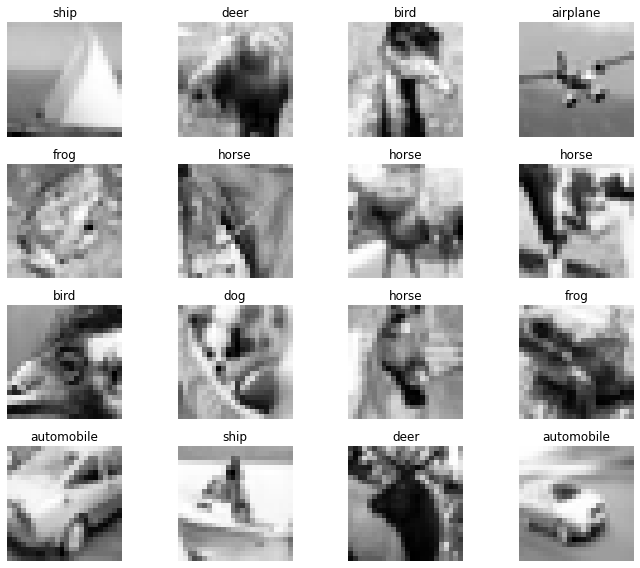

In [9]:
# show some examples
import matplotlib.pyplot as plt
import random
%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 8]

def show_some_examples(names, data, labels):
    plt.figure()
    rows, cols = 4, 4
    random_idxs = random.sample(range(len(data)), rows * cols)
    for i in range(rows * cols):
        plt.subplot(rows, cols, i+1)
        j = random_idxs[i]
        plt.title(names[labels[j]])
        img = np.reshape(data[j, :], (24, 24))
        plt.imshow(img, cmap='Greys_r')
        plt.axis('off')
    plt.tight_layout()
    plt.show()
    
show_some_examples(names, data, labels)

In [10]:
# show weights
W = tf.Variable(tf.random_normal([5, 5, 1, 32]))

def show_weights(W, filename=None):
    plt.figure()
    rows, cols = 4, 8
    for i in range(np.shape(W)[3]):
        img = W[:, :, 0, i]
        plt.subplot(rows, cols, i +1)
        plt.imshow(img, cmap='Greys_r', interpolation='none')
        plt.axis=('off')
    if filename:
        plt.savefig(filename)
    else:
        plt.show()

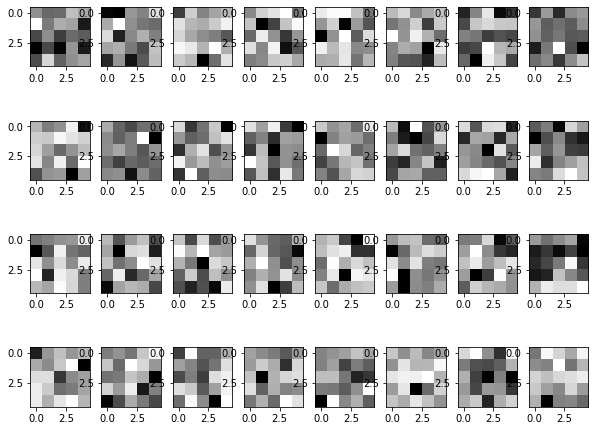

In [11]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    W_val = sess.run(W)
    show_weights(W_val)

In [12]:
def show_conv_results(data, filename=None):
    plt.figure()
    rows, cols = 4, 8
    for i in range(np.shape(data)[3]):
        img = data[0, :, :, i]
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img, cmap='Greys_r', interpolation='none')
        plt.axis('off')
    if filename:
        plt.savefig(filename)
    else:   
        plt.show()

UnknownError: 2 root error(s) found.
  (0) Unknown: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node Conv2D_2 (defined at <ipython-input-16-793164163e8c>:7) ]]
	 [[Conv2D_2/_1]]
  (1) Unknown: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node Conv2D_2 (defined at <ipython-input-16-793164163e8c>:7) ]]
0 successful operations.
0 derived errors ignored.

Errors may have originated from an input operation.
Input Source operations connected to node Conv2D_2:
 Variable/read (defined at <ipython-input-10-34f45681ec5b>:2)	
 Reshape_2 (defined at <ipython-input-16-793164163e8c>:5)

Input Source operations connected to node Conv2D_2:
 Variable/read (defined at <ipython-input-10-34f45681ec5b>:2)	
 Reshape_2 (defined at <ipython-input-16-793164163e8c>:5)

Original stack trace for 'Conv2D_2':
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\ipykernel\kernelapp.py", line 583, in start
    self.io_loop.start()
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\tornado\platform\asyncio.py", line 149, in start
    self.asyncio_loop.run_forever()
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\asyncio\base_events.py", line 541, in run_forever
    self._run_once()
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\asyncio\base_events.py", line 1786, in _run_once
    handle._run()
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\tornado\gen.py", line 787, in inner
    self.run()
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\tornado\gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\ipykernel\kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\ipykernel\kernelbase.py", line 545, in execute_request
    user_expressions, allow_stdin,
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\ipykernel\ipkernel.py", line 300, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\IPython\core\interactiveshell.py", line 2858, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\IPython\core\interactiveshell.py", line 2886, in _run_cell
    return runner(coro)
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3063, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3254, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-16-793164163e8c>", line 7, in <module>
    conv = tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\tensorflow_core\python\ops\nn_ops.py", line 2011, in conv2d
    name=name)
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\tensorflow_core\python\ops\gen_nn_ops.py", line 969, in conv2d
    data_format=data_format, dilations=dilations, name=name)
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\tensorflow_core\python\framework\op_def_library.py", line 742, in _apply_op_helper
    attrs=attr_protos, op_def=op_def)
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\tensorflow_core\python\framework\ops.py", line 3322, in _create_op_internal
    op_def=op_def)
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\tensorflow_core\python\framework\ops.py", line 1756, in __init__
    self._traceback = tf_stack.extract_stack()


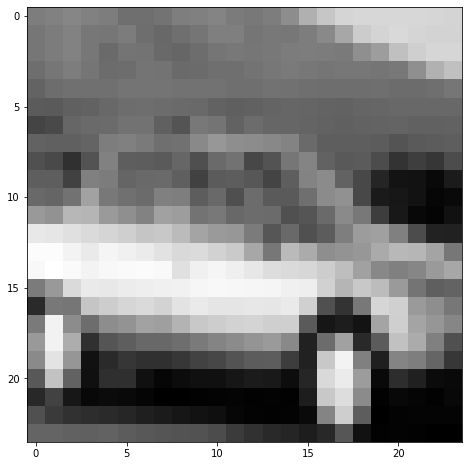

In [16]:
raw_data = data[4, :]
raw_img = np.reshape(raw_data, (24, 24))
plt.figure()
plt.imshow(raw_img, cmap='Greys_r')
x = tf.reshape(raw_data, shape=[-1, 24, 24, 1])
b = tf.Variable(tf.random_normal([32])) 
conv = tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')
conv_with_b = tf.nn.bias_add(conv, b)
conv_out = tf.nn.relu(conv_with_b)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    conv_val = sess.run(conv)
    show_conv_results(conv_val, 'temp1.png')
    print(np.shape(conv_val))
    
conv_out_val = sess.run(conv_out)
show_conv_results(conv_out_val, 'temp2.png') 
print(np.shape(conv_out_val))            

In [15]:
k = 2 
maxpool = tf.nn.max_pool(conv_out,  
                         ksize=[1, k, k, 1], 
                         strides=[1, k, k, 1],    
                         padding='SAME')
with tf.Session() as sess: 
    maxpool_val = sess.run(maxpool)
    show_conv_results(maxpool_val, 'step3_maxpool.png') 
    print(np.shape(maxpool_val))
    

FailedPreconditionError: 2 root error(s) found.
  (0) Failed precondition: Attempting to use uninitialized value Variable
	 [[node Variable/read (defined at <ipython-input-10-34f45681ec5b>:2) ]]
	 [[MaxPool/_1]]
  (1) Failed precondition: Attempting to use uninitialized value Variable
	 [[node Variable/read (defined at <ipython-input-10-34f45681ec5b>:2) ]]
0 successful operations.
0 derived errors ignored.

Original stack trace for 'Variable/read':
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\ipykernel\kernelapp.py", line 583, in start
    self.io_loop.start()
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\tornado\platform\asyncio.py", line 149, in start
    self.asyncio_loop.run_forever()
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\asyncio\base_events.py", line 541, in run_forever
    self._run_once()
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\asyncio\base_events.py", line 1786, in _run_once
    handle._run()
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\tornado\gen.py", line 787, in inner
    self.run()
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\tornado\gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\ipykernel\kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\ipykernel\kernelbase.py", line 545, in execute_request
    user_expressions, allow_stdin,
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\ipykernel\ipkernel.py", line 300, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\IPython\core\interactiveshell.py", line 2858, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\IPython\core\interactiveshell.py", line 2886, in _run_cell
    return runner(coro)
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3063, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3254, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-34f45681ec5b>", line 2, in <module>
    W = tf.Variable(tf.random_normal([5, 5, 1, 32]))
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\tensorflow_core\python\ops\variables.py", line 258, in __call__
    return cls._variable_v1_call(*args, **kwargs)
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\tensorflow_core\python\ops\variables.py", line 219, in _variable_v1_call
    shape=shape)
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\tensorflow_core\python\ops\variables.py", line 197, in <lambda>
    previous_getter = lambda **kwargs: default_variable_creator(None, **kwargs)
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\tensorflow_core\python\ops\variable_scope.py", line 2612, in default_variable_creator
    shape=shape)
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\tensorflow_core\python\ops\variables.py", line 262, in __call__
    return super(VariableMetaclass, cls).__call__(*args, **kwargs)
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\tensorflow_core\python\ops\variables.py", line 1684, in __init__
    shape=shape)
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\tensorflow_core\python\ops\variables.py", line 1872, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\tensorflow_core\python\util\dispatch.py", line 180, in wrapper
    return target(*args, **kwargs)
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\tensorflow_core\python\ops\array_ops.py", line 267, in identity
    ret = gen_array_ops.identity(input, name=name)
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\tensorflow_core\python\ops\gen_array_ops.py", line 3829, in identity
    "Identity", input=input, name=name)
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\tensorflow_core\python\framework\op_def_library.py", line 742, in _apply_op_helper
    attrs=attr_protos, op_def=op_def)
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\tensorflow_core\python\framework\ops.py", line 3322, in _create_op_internal
    op_def=op_def)
  File "c:\programdata\anaconda3\envs\tf_gpu\lib\site-packages\tensorflow_core\python\framework\ops.py", line 1756, in __init__
    self._traceback = tf_stack.extract_stack()
